In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [48]:
location = "datasets/datasets/diamonds.csv"
df = pd.read_csv(location)

In [49]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [50]:
df.loc[(df['price'])]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
326,327,0.53,Ideal,F,IF,61.9,54.0,2802,5.22,5.25,3.24
326,327,0.53,Ideal,F,IF,61.9,54.0,2802,5.22,5.25,3.24
327,328,0.72,Premium,E,VS2,63.0,55.0,2802,5.79,5.61,3.59
334,335,0.71,Premium,F,VS2,62.6,58.0,2803,5.70,5.67,3.56
335,336,0.71,Premium,F,VS2,58.0,62.0,2803,5.85,5.81,3.38
336,337,0.71,Premium,G,VS1,62.4,61.0,2803,5.70,5.65,3.54
336,337,0.71,Premium,G,VS1,62.4,61.0,2803,5.70,5.65,3.54
337,338,0.77,Premium,G,VS2,61.3,57.0,2803,5.93,5.88,3.62
337,338,0.77,Premium,G,VS2,61.3,57.0,2803,5.93,5.88,3.62
338,339,0.71,Premium,G,VS2,59.9,60.0,2803,5.81,5.77,3.47


In [51]:
#Define bins as 0-60, 60-70, 70-80, 80-90, 90-100
bins = [0 , 6666, 13332, 20000]

# Create names for the four groups
group_names = ['Budget Buyers', 'Mid-Level Buyers' , "Big Baller's Shot Caller's"]

#make new column with letter grades
df['Price Point'] = pd.cut(df['price'], bins, labels=group_names)
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,Price Point
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Budget Buyers
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Budget Buyers
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Budget Buyers
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Budget Buyers
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Budget Buyers


In [52]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,Price Point
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Budget Buyers
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Budget Buyers
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Budget Buyers
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Budget Buyers
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Budget Buyers
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,Budget Buyers
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,Budget Buyers
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,Budget Buyers
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,Budget Buyers
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,Budget Buyers


In [82]:
df.sort_values('Price Point')

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,Price Point
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Budget Buyers
36363,36364,0.33,Ideal,F,VVS1,61.3,55.0,939,4.45,4.46,2.73,Budget Buyers
36364,36365,0.33,Ideal,F,VVS1,61.9,55.0,939,4.46,4.47,2.76,Budget Buyers
36365,36366,0.33,Ideal,F,VVS1,60.6,56.0,939,4.47,4.51,2.72,Budget Buyers
36366,36367,0.39,Ideal,F,VS1,61.9,55.2,939,4.66,4.70,2.89,Budget Buyers
36367,36368,0.39,Ideal,F,VS1,61.7,56.1,939,4.65,4.70,2.89,Budget Buyers
36368,36369,0.34,Premium,G,IF,60.5,58.0,939,4.52,4.47,2.72,Budget Buyers
36369,36370,0.40,Ideal,E,VS1,61.2,55.0,940,4.76,4.79,2.92,Budget Buyers
36370,36371,0.33,Ideal,D,VS2,61.5,56.0,940,4.47,4.50,2.76,Budget Buyers
36371,36372,0.33,Ideal,D,VS2,60.9,56.0,940,4.49,4.51,2.74,Budget Buyers


In [53]:
df.rename(columns={'Unnamed: 0': 'Number'}, inplace =True)
df.head()

,Number,carat,cut,color,clarity,depth,table,price,x,y,z,Price Point
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Budget Buyers
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Budget Buyers
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Budget Buyers
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Budget Buyers
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Budget Buyers


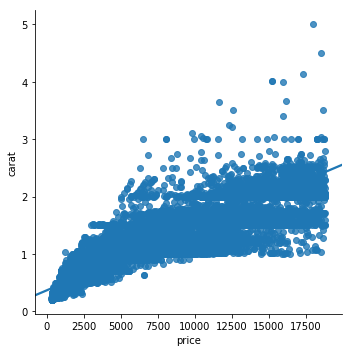

In [54]:
sns.lmplot(x='price', y='carat', data=df)

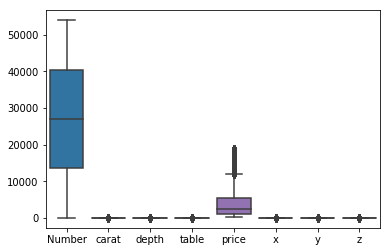

In [36]:
sns.boxplot(data=df)

In [55]:
df.head()

,Number,carat,cut,color,clarity,depth,table,price,x,y,z,Price Point
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Budget Buyers
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Budget Buyers
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Budget Buyers
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Budget Buyers
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Budget Buyers


In [56]:
newtable = df.drop('Number', axis=1)

In [57]:
newtable.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,Price Point
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Budget Buyers
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Budget Buyers
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Budget Buyers
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Budget Buyers
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Budget Buyers


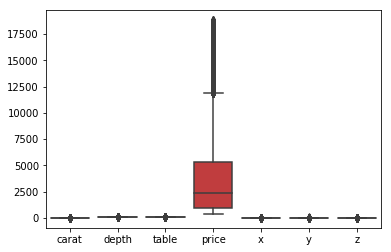

In [20]:
sns.boxplot(data = newtable)

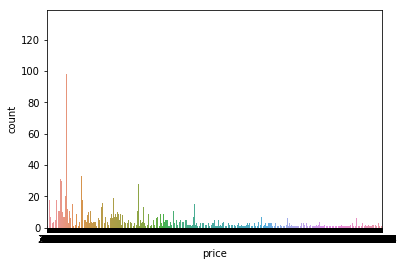

In [21]:
sns.countplot(x='price', data=newtable)

In [24]:
'import statsmodels.formula.api as smf'
"cut = {
    'Ideal' : 5,
    'Premium' : 4,
    'Very Good' : 3,
    'Good' : 2,
    'Fair' : 1,
    
} "


In [37]:
df.isnull().sum()

Number     0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [40]:
newtable.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,Price Point
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Budget Buyers
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Budget Buyers
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Budget Buyers
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Budget Buyers
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Budget Buyers


In [58]:
newtable['cut'] = newtable['cut'].map({'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2, 'Fair':1})
newtable['color'] = newtable['color'].map({'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7})


In [59]:
newtable.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,Price Point
0,0.23,5,2,SI2,61.5,55.0,326,3.95,3.98,2.43,Budget Buyers
1,0.21,4,2,SI1,59.8,61.0,326,3.89,3.84,2.31,Budget Buyers
2,0.23,2,2,VS1,56.9,65.0,327,4.05,4.07,2.31,Budget Buyers
3,0.29,4,6,VS2,62.4,58.0,334,4.20,4.23,2.63,Budget Buyers
4,0.31,2,7,SI2,63.3,58.0,335,4.34,4.35,2.75,Budget Buyers


In [60]:
newtable['clarity'] = newtable['clarity'].map({'FL': 1, 'IF': 2, 'VVS1': 3, 'VVS2': 4, 'VS1': 5, 'VS2': 6, 'SI1': 7, 'SI2': 8, 'I1': 9, 'I2':10, 'I3':11})

In [61]:
newtable.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,Price Point
0,0.23,5,2,8,61.5,55.0,326,3.95,3.98,2.43,Budget Buyers
1,0.21,4,2,7,59.8,61.0,326,3.89,3.84,2.31,Budget Buyers
2,0.23,2,2,5,56.9,65.0,327,4.05,4.07,2.31,Budget Buyers
3,0.29,4,6,6,62.4,58.0,334,4.20,4.23,2.63,Budget Buyers
4,0.31,2,7,8,63.3,58.0,335,4.34,4.35,2.75,Budget Buyers


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)


ZeroDivisionError: 0.0 cannot be raised to a negative power

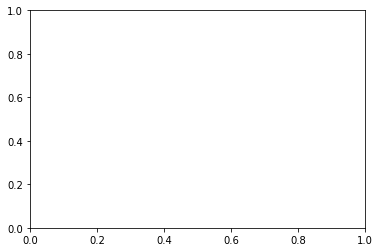

In [74]:
#plot age by survival status
#plt.figure(figsize=(10,6))

ax = sns.kdeplot(newtable['price'][newtable['clarity'] == 1], 
                 color="darkturquoise",
                 shade=False)

sns.kdeplot(newtable['price'][newtable['clarity'] == 2], 
            color="orange",
            shade=False)

#sns.kdeplot(newtable['price'][newtable['clarity'] == 3], 
#            color="green",
 #           shade=False)

#sns.kdeplot(newtable['price'][newtable['clarity'] == 4], 
 #           color="purple",
  #          shade=False)

#sns.kdeplot(newtable['price'][newtable['clarity'] == 5], 
   #         color="grey",
    #        shade=False)

#sns.kdeplot(newtable['price'][newtable['clarity'] == 6], 
   #         color="purple",
   #         shade=False)

#sns.kdeplot(newtable['price'][newtable['clarity'] == 7], 
    #        color="black",
   #         shade=False)

#sns.kdeplot(newtable['price'][newtable['clarity'] == 8], 
     #       color="yellow",
     #       shade=False)

#sns.kdeplot(newtable['price'][newtable['clarity'] == 9], 
     #       color="pink",
     #       shade=False)

#sns.kdeplot(newtable['price'][newtable['clarity'] == 10], 
      #      color="brown",
      #      shade=False)

#sns.kdeplot(newtable['price'][newtable['clarity'] == 11], 
     #       color="red",
      #      shade=False) 



#plt.legend (['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'])
plt.legend ([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
plt.title('Price vs Clarity')

ax.set(xlabel='Price')

In [1]:
df.corr()

NameError: name 'df' is not defined